<a href="https://colab.research.google.com/github/Parixit2767/Python/blob/main/Descriptive_Stats_Assign_Parixit_Rathore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import pandas as pd
import numpy as np
import statistics as stat
import seaborn as sns
import matplotlib.pyplot as plt

In [104]:
data=pd.read_excel("Worksheet in Maths_for _DS.xlsm")


In [105]:
data.describe()

,carat,depth,table,weight,size,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,5.731157,5.734526,3932.799722
std,0.474011,1.432621,2.234491,1.121761,1.142135,3989.439738
min,0.200000,43.000000,43.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,950.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,2401.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,5324.250000
max,5.010000,79.000000,95.000000,10.740000,58.900000,18823.000000


In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   weight   53940 non-null  float64
 7   size     53940 non-null  float64
 8   price    53940 non-null  int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 3.7+ MB


In [107]:
data.head()

,carat,cut,color,clarity,depth,table,weight,size,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,335


Q1
A.	Create 2 dataframes out of this dataframe – 1 with all numerical variables and other with all categorical variables.

In [108]:
cat_df=data.select_dtypes("object")
cat_df

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2
...,...,...,...
53935,Ideal,D,SI1
53936,Good,D,SI1
53937,Very Good,D,SI1
53938,Premium,H,SI2


In [109]:
num_df=data.select_dtypes(["float64","int64"])
num_df

,carat,depth,table,weight,size,price
0,0.23,61.5,55.0,3.95,3.98,326
1,0.21,59.8,61.0,3.89,3.84,326
2,0.23,56.9,65.0,4.05,4.07,327
3,0.29,62.4,58.0,4.20,4.23,334
4,0.31,63.3,58.0,4.34,4.35,335
...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,2757
53936,0.72,63.1,55.0,5.69,5.75,2757
53937,0.70,62.8,60.0,5.66,5.68,2757
53938,0.86,61.0,58.0,6.15,6.12,2757


B.	Calculate the measure of central tendency of numerical variables using Pandas and statistics libraries and check if the calculated values are different between these 2 libraries.

In [110]:
mean_pandas = num_df.mean()
median_pandas = num_df.median()
mode_pandas = num_df.mode().iloc[0]

mean_stat = num_df.apply(lambda x: stat.mean(x), axis=0)
median_stat = num_df.apply(lambda x: stat.median(x), axis=0)
mode_stat = num_df.apply(lambda x: stat.mode(x), axis=0)

C.	Check the skewness of all numeric variables. Mention against each variable if its highly skewed/light skewed/ Moderately skwewed.

In [111]:
skew_matrix=num_df.skew()

In [112]:
def classify_skew(value):
    if abs(value) < 0.5:
        return 'Lightly Skewed'
    elif abs(value) < 1:
        return 'Moderately Skewed'
    else:
        return 'Highly Skewed'

In [113]:
skew_classification=skew_matrix.apply(classify_skew)
skew_classification

,0
carat,Highly Skewed
depth,Lightly Skewed
table,Moderately Skewed
weight,Lightly Skewed
size,Highly Skewed
price,Highly Skewed


In [114]:
skew_df=pd.DataFrame({"Skewness":skew_matrix,"Classification":skew_classification})
skew_df

,Skewness,Classification
carat,1.116646,Highly Skewed
depth,-0.082294,Lightly Skewed
table,0.796896,Moderately Skewed
weight,0.378676,Lightly Skewed
size,2.434167,Highly Skewed
price,1.618395,Highly Skewed


carat,size and price are highly skewed needs to be treated

D.	Use the different transformation techniques to convert skewed data found in previous question into normal distribution.

In [115]:
from scipy.stats import boxcox

In [116]:
original_skeness=skew_df[skew_df["Skewness"]>1]
print(original_skeness)

       Skewness Classification
carat  1.116646  Highly Skewed
size   2.434167  Highly Skewed
price  1.618395  Highly Skewed


Log Transformation

In [117]:
log_trans=np.log(num_df[["carat","size","price"]]+1) #+1 to avoid log(0)
print(log_trans)


          carat      size     price
0      0.207014  1.605430  5.789960
1      0.190620  1.576915  5.789960
2      0.207014  1.623341  5.793014
3      0.254642  1.654411  5.814131
4      0.270027  1.677097  5.817111
...         ...       ...       ...
53935  0.542324  1.911023  7.922261
53936  0.542324  1.909543  7.922261
53937  0.530628  1.899118  7.922261
53938  0.620576  1.962908  7.922261
53939  0.559616  1.927164  7.922261

[53940 rows x 3 columns]


In [118]:
log_skewness_df=log_trans.skew()
log_skewness_df


,0
carat,0.580654
size,0.006600
price,0.115926


Squre root transformation

In [119]:
sqrt_trans=np.sqrt(num_df[["carat","size","price"]])
print(sqrt_trans)

          carat      size      price
0      0.479583  1.994994  18.055470
1      0.458258  1.959592  18.055470
2      0.479583  2.017424  18.083141
3      0.538516  2.056696  18.275667
4      0.556776  2.085665  18.303005
...         ...       ...        ...
53935  0.848528  2.400000  52.507142
53936  0.848528  2.397916  52.507142
53937  0.836660  2.383275  52.507142
53938  0.927362  2.473863  52.507142
53939  0.866025  2.422808  52.507142

[53940 rows x 3 columns]


In [120]:
sqrt_skewness_df=sqrt_trans.skew()
sqrt_skewness_df

,0
carat,0.548471
size,0.363648
price,0.844396


Cube root transformation

In [121]:
cbrt_trans=np.cbrt(num_df[["carat","size","price"]])
print(cbrt_trans)

          carat      size      price
0      0.612693  1.584751   6.882389
1      0.594392  1.565947   6.882389
2      0.612693  1.596607   6.889419
3      0.661911  1.617261   6.938232
4      0.676790  1.632412   6.945150
...         ...       ...        ...
53935  0.896281  1.792562  14.022074
53936  0.896281  1.791524  14.022074
53937  0.887904  1.784224  14.022074
53938  0.950969  1.829155  14.022074
53939  0.908560  1.803901  14.022074

[53940 rows x 3 columns]


In [122]:
cbrt_skewness_df=cbrt_trans.skew()
cbrt_skewness_df

,0
carat,0.386589
size,-0.132075
price,0.591189


BoxCox

In [123]:
Boxcox_trans=num_df[["carat","size","price"]].apply(lambda x: boxcox(x+1)[0])
print(Boxcox_trans)

          carat      size     price
0      0.182396  1.595582  4.793885
1      0.169610  1.567413  4.793885
2      0.182396  1.613272  4.795951
3      0.218091  1.643954  4.810232
4      0.229174  1.666351  4.812246
...         ...       ...       ...
53935  0.393846  1.897080  6.138301
53936  0.393846  1.895621  6.138301
53937  0.387864  1.885347  6.138301
53938  0.431689  1.948199  6.138301
53939  0.402529  1.912985  6.138301

[53940 rows x 3 columns]


In [124]:
Boxcox_skewness_df=Boxcox_trans.skew()
Boxcox_skewness_df

,0
carat,0.117887
size,-0.000807
price,0.025726


In [125]:
skew_comp=pd.concat([original_skeness["Skewness"], log_skewness_df, sqrt_skewness_df, cbrt_skewness_df, Boxcox_skewness_df],
    axis=1)
skew_comp.columns=["Original", "Log", "SquareRoot", "Cuberoot", "Boxcox"]
skew_comp

,Original,Log,SquareRoot,Cuberoot,Boxcox
carat,1.116646,0.580654,0.548471,0.386589,0.117887
size,2.434167,0.006600,0.363648,-0.132075,-0.000807
price,1.618395,0.115926,0.844396,0.591189,0.025726


Boxtransformation giving the minimum skewness after transformation

E.	Create a user defined function in python to check the outliers using IQR method. Then pass all numeric variables in that function to check outliers.

In [126]:
def IQR_check(series):
  Q1 = series.quantile(0.25)
  Q3 = series.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outofbound = series[(series < lower_bound) | (series > upper_bound)]
  return outofbound

In [127]:
outlier_dict = {}
for i in num_df.columns:
  outliers=IQR_check(num_df[i])
  outlier_dict[i] = outliers

for col, series in outlier_dict.items():
    print(f"Outliers for {col}:")
    print(series)
    print()










Outliers for carat:
12246    2.06
13002    2.14
13118    2.15
13757    2.22
13991    2.01
         ... 
27741    2.15
27742    2.04
27744    2.29
27746    2.07
27749    2.29
Name: carat, Length: 1889, dtype: float64

Outliers for depth:
2        56.9
8        65.1
24       58.1
35       58.2
42       65.2
         ... 
53882    65.4
53886    58.0
53890    57.9
53895    57.8
53927    58.1
Name: depth, Length: 2545, dtype: float64

Outliers for table:
2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

Outliers for weight:
11182     0.00
11963     0.00
15951     0.00
22741     9.54
22831     9.38
23644     9.53
24131     9.44
24297     9.49
24328     9.65
24520     0.00
24816     9.42
25460     9.44
25850     9.32
25998    10.14
25999    10.02
26243     0.00
26431     9.42
26444    10.01
26534     9.86
26932     9.30
27130    10.00
27415    10.74

F.	Convert categorical variables into numerical variables using LabelEncoder technique.

In [128]:
from sklearn.preprocessing import LabelEncoder

In [129]:
le = LabelEncoder()

df_encoded = data.copy()

for col in df_encoded.select_dtypes("object"):
    df_encoded[col] = le.fit_transform(df_encoded[col])

print(df_encoded)

       carat  cut  color  clarity  depth  table  weight  size  price
0       0.23    2      1        3   61.5   55.0    3.95  3.98    326
1       0.21    3      1        2   59.8   61.0    3.89  3.84    326
2       0.23    1      1        4   56.9   65.0    4.05  4.07    327
3       0.29    3      5        5   62.4   58.0    4.20  4.23    334
4       0.31    1      6        3   63.3   58.0    4.34  4.35    335
...      ...  ...    ...      ...    ...    ...     ...   ...    ...
53935   0.72    2      0        2   60.8   57.0    5.75  5.76   2757
53936   0.72    1      0        2   63.1   55.0    5.69  5.75   2757
53937   0.70    4      0        2   62.8   60.0    5.66  5.68   2757
53938   0.86    3      4        3   61.0   58.0    6.15  6.12   2757
53939   0.75    2      0        3   62.2   55.0    5.83  5.87   2757

[53940 rows x 9 columns]


G.	Use both the feature scaling techniques (standardscaler/min max scaler) on all the variables

In [130]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

Applying Standard Scaler

In [131]:
scaled_df=data.copy()
std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

In [132]:
num_cols=scaled_df.select_dtypes(["float64","int64"]).columns

In [133]:
std_scaler_df=scaled_df.copy()
std_scaler_df[num_cols] = std_scaler.fit_transform(std_scaler_df[num_cols])

std_scaler_df[num_cols]


,carat,depth,table,weight,size,price
0,-1.198168,-0.174092,-1.099672,-1.587837,-1.536196,-0.904095
1,-1.240361,-1.360738,1.585529,-1.641325,-1.658774,-0.904095
2,-1.198168,-3.385019,3.375663,-1.498691,-1.457395,-0.903844
3,-1.071587,0.454133,0.242928,-1.364971,-1.317305,-0.902090
4,-1.029394,1.082358,0.242928,-1.240167,-1.212238,-0.901839
...,...,...,...,...,...,...
53935,-0.164427,-0.662711,-0.204605,0.016798,0.022304,-0.294731
53936,-0.164427,0.942753,-1.099672,-0.036690,0.013548,-0.294731
53937,-0.206621,0.733344,1.137995,-0.063434,-0.047741,-0.294731
53938,0.130927,-0.523105,0.242928,0.373383,0.337506,-0.294731


Applying Minmax scaler

In [134]:
minmax_scaler_df=scaled_df.copy()
minmax_scaler_df[num_cols] = minmax_scaler.fit_transform(minmax_scaler_df[num_cols])

minmax_scaler_df[num_cols]

,carat,depth,table,weight,size,price
0,0.006237,0.513889,0.230769,0.367784,0.067572,0.000000
1,0.002079,0.466667,0.346154,0.362197,0.065195,0.000000
2,0.006237,0.386111,0.423077,0.377095,0.069100,0.000054
3,0.018711,0.538889,0.288462,0.391061,0.071817,0.000433
4,0.022869,0.563889,0.288462,0.404097,0.073854,0.000487
...,...,...,...,...,...,...
53935,0.108108,0.494444,0.269231,0.535382,0.097793,0.131427
53936,0.108108,0.558333,0.230769,0.529795,0.097623,0.131427
53937,0.103950,0.550000,0.326923,0.527002,0.096435,0.131427
53938,0.137214,0.500000,0.288462,0.572626,0.103905,0.131427


H.	Create the Histogram for all numeric variables and draw the KDE plot on that.

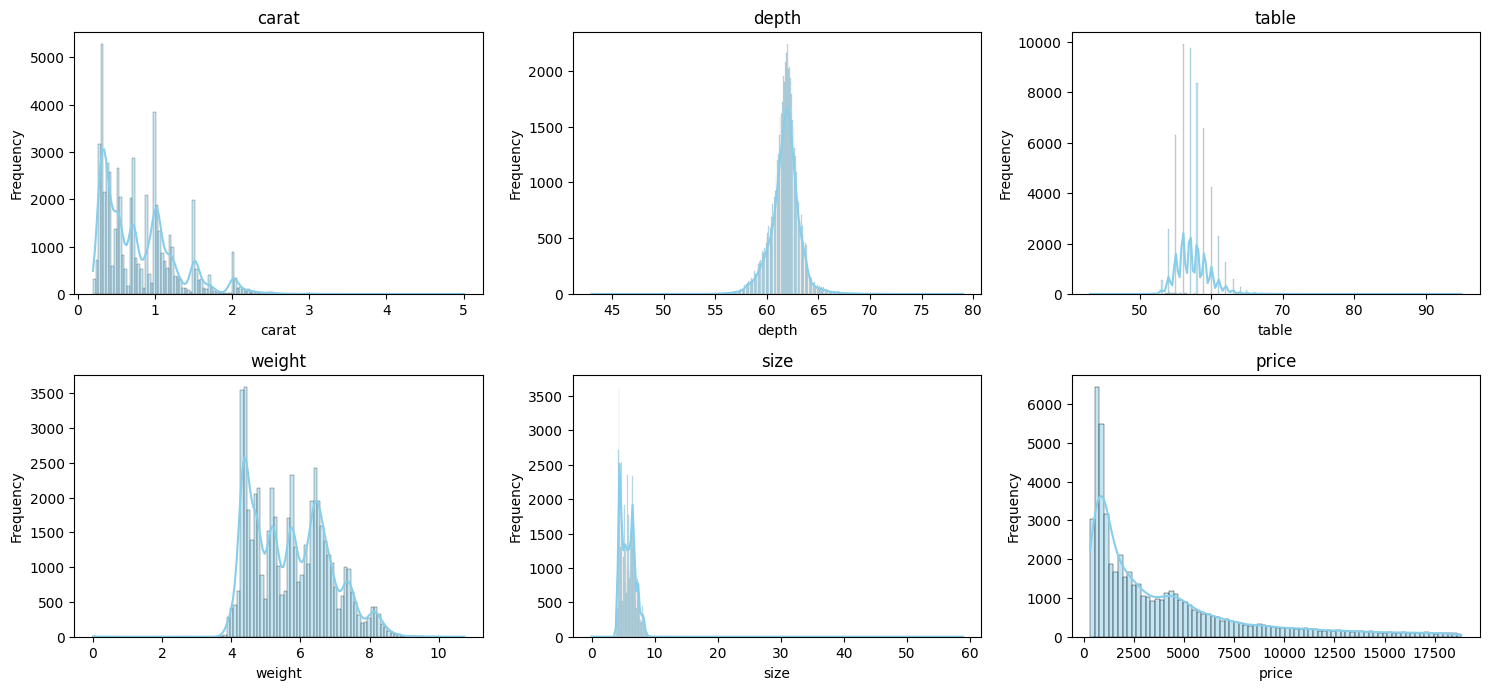

In [135]:
plt.figure(figsize=(15, 10))


for i in range(len(num_cols)):
    plt.subplot(3, 3, i + 1)  # 3 rows x 3 columns grid
    sns.histplot(data[num_cols[i]], kde=True, color='skyblue')
    plt.title(num_cols[i])
    plt.xlabel(num_cols[i])
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



carat,size,price are right skewed

I.	Check the correlation between all the numeric variables using HeatMap and try to draw some conclusion about the data

In [136]:
corr_matrix=data[num_cols].corr(method="spearman")
corr_matrix

,carat,depth,table,weight,size,price
carat,1.000000,0.030104,0.194980,0.996117,0.995572,0.962883
depth,0.030104,1.000000,-0.245061,-0.023442,-0.025425,0.010020
table,0.194980,-0.245061,1.000000,0.202231,0.195734,0.171784
weight,0.996117,-0.023442,0.202231,1.000000,0.997895,0.963196
size,0.995572,-0.025425,0.195734,0.997895,1.000000,0.962719
price,0.962883,0.010020,0.171784,0.963196,0.962719,1.000000


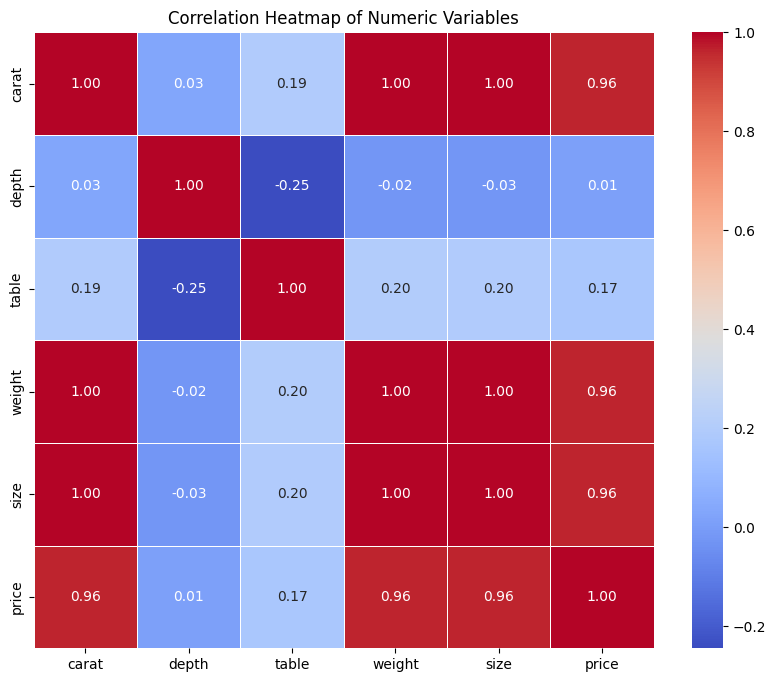

In [137]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

a. Price is highly influenced by carat, weight, and
size.

b. Weight, Carat, Size and price are strongly inter-related (almost perfect correlation).

c. Depth and Table are weakly correlated with price — they may not be major factors in determining price

Q2. Explain Gradient descent in detail. How changing the values of learning rate can impact the convergence in Gradient Descent

Gradient Descent is an algorithm used to find the best parameters (like weights in a model) that minimize the error (cost) between predicted and actual values. It works by following these steps:

1.Start with random values for the parameters.

2.Calculate the gradient, which shows how much change in the parameters will reduce the error.

3.Update the parameters by moving them towards the global minima(minimum error)

4.Repeat until the error is small or the updates become very small.

Learning Rate:
The learning rate controls how big a step the algorithm takes in the right direction. Here's how it affects the process:

Small learning rate: Takes tiny steps, making slow progress but more stable.Takes very large time.

Large learning rate: Takes big steps, which can overshoot the global minima

Optimal learning rate: Balances speed and stability, allowing quick and steady progress toward the best solution.

In short, the learning rate affects how quickly the algorithm finds the best solution—too small is slow, too large can make it unstable.